In [ ]:
#Descargamos el archivo desde el drive
!gdown https://drive.google.com/u/0/1H_RMnle_fbyEa5or5oGQMSp9B6KpMEN3&export=download

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/u/0/1H_RMnle_fbyEa5or5oGQMSp9B6KpMEN3
To: /content/1H_RMnle_fbyEa5or5oGQMSp9B6KpMEN3
141B [00:00, 346kB/s]


##Importaciones y descargas

In [ ]:
import pandas as pd
import nltk
import pickle
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('names')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

##Dataset

In [ ]:
dataset = pd.read_csv("/content/fake_or_real_news.csv")
dataset

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


<Axes: >

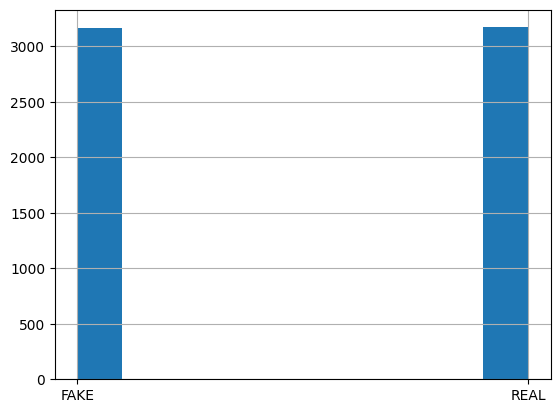

In [ ]:
dataset["label"].hist()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
dataset["Rank"] = dataset["label"].rank(method="first")

In [ ]:
import pandas as pd

dataset["Quartile"] = pd.qcut(dataset["Rank"], q=5, labels=[1, 2, 3, 4, 5])

In [ ]:
dataset['Quartile'].value_counts()

1    1267
2    1267
3    1267
4    1267
5    1267
Name: Quartile, dtype: int64

##Limpieza

In [ ]:
stoplist = nltk.corpus.stopwords.words("english")
names = nltk.corpus.names.words()
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
#Se crea una funcion para empezar el proceso de limpiado y lematizacion
from nltk.stem.snowball import stopwords
def get_tokens(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stoplist: continue
    if token in names: continue
    if not token.isalpha(): continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    #token = stemmer.stem(token)
    cleaned_tokens.append(token)

  #cleaned_tokens = [i for i in pos_tag(cleaned_tokens) if i [1][:2] in ["RB", "VB", "JJ", "NN"]]

  return cleaned_tokens

In [ ]:
full_vocabulary = []
vocabulary = {category:[] for category in dataset["Quartile"].unique()}
for _, row in dataset.iterrows():
  tokens = get_tokens(row['text'])
  full_vocabulary += tokens
  vocabulary[row["Quartile"]] += tokens

In [ ]:
FreqDist(full_vocabulary).most_common(20)

[('the', 30589),
 ('trump', 21961),
 ('i', 21671),
 ('said', 21162),
 ('state', 14886),
 ('would', 12928),
 ('one', 11809),
 ('people', 11722),
 ('it', 9540),
 ('republican', 9436),
 ('new', 9263),
 ('president', 8792),
 ('time', 8762),
 ('but', 8745),
 ('year', 8667),
 ('in', 8542),
 ('also', 8213),
 ('campaign', 8185),
 ('obama', 8121),
 ('american', 7776)]

In [ ]:
FreqDist(vocabulary[2]).most_common(20)

[('the', 5850),
 ('i', 4075),
 ('trump', 2524),
 ('people', 2404),
 ('one', 2228),
 ('would', 2119),
 ('state', 2101),
 ('u', 2054),
 ('it', 1746),
 ('said', 1606),
 ('in', 1588),
 ('time', 1571),
 ('year', 1474),
 ('american', 1453),
 ('a', 1440),
 ('new', 1416),
 ('election', 1416),
 ('this', 1367),
 ('like', 1363),
 ('also', 1339)]

##Instancias Pickle

In [ ]:
most_common_tokens = set()

for quartile in dataset["Quartile"].unique():
  most_common_quartile_tokens = [i[0] for i in FreqDist(vocabulary[quartile]).most_common(250)]
  most_common_tokens = most_common_tokens.union(set(most_common_quartile_tokens))
  with open(f"most_common.tokens", "wb") as file:
    pickle.dump(most_common_tokens, file)

In [ ]:
print(len(list(most_common_tokens)))

348


##Entrenamiento del modelo

In [ ]:
#Funcion de entrenamiento donde ya se trabaja con los tokens limpios
def get_tokens_training(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stoplist: continue
    if token in names: continue
    if not token.isalpha(): continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    if token not in most_common_tokens: continue
    cleaned_tokens.append(token)

#Aca lo que me retorna es cada token en un input separado por espacios
  return " ".join(cleaned_tokens)

In [ ]:
#Creacion de columna nueva con la funcion lambda donde cada token en un input se divide por espacios
dataset['Tokens String'] = dataset['text'].apply(lambda x: get_tokens_training(x))
dataset

,Unnamed: 0,title,text,label,Rank,Quartile,Tokens String
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1.0,1,new york in election war fbi the word around e...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2.0,1,there two world want president and never presi...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,3165.0,3,secretary state said monday later week top ame...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,3.0,1,november the time democrat voter running candi...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,3166.0,3,it primary day new york trump poll trump win e...
...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,6333.0,5,the state department told republican national ...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,3163.0,3,the in public system year job question also qu...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,3164.0,3,always part the order by name presidential ele...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,6334.0,5,obama leader several nation monday effort even...


In [ ]:
#Vectorizando la data
vectorizer = TfidfVectorizer(vocabulary = most_common_tokens)
X = vectorizer.fit_transform(dataset['Tokens String'])
X

<6335x348 sparse matrix of type '<class 'numpy.float64'>'
	with 476687 stored elements in Compressed Sparse Row format>

In [ ]:
import scipy.sparse
X = pd.DataFrame.sparse.from_spmatrix(X)

In [ ]:
with open("vectorizer.pkl", "wb") as file:
  pickle.dump(vectorizer, file)

In [ ]:
y = dataset["label"]

##Modelos de entrenamiento

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Buscando el accuracy de los 10 modelos seleccionados para saber cual de estos es mas eficiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Manejar NaN en y_train
nan_rows_train = y_train.isnull()
X_train = X_train[~nan_rows_train]
y_train = y_train.dropna()

# Manejar NaN en y_test
nan_rows_test = y_test.isnull()
X_test = X_test[~nan_rows_test]
y_test = y_test.dropna()

# Imputar valores en lugar de NaN si es necesario
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train = pd.Series(y_train_imputed.flatten(), index=y_train.index)

y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))
y_test = pd.Series(y_test_imputed.flatten(), index=y_test.index)

#modelos
models = [AdaBoostRegressor(), KNeighborsRegressor(), RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression(), SGDRegressor()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ms_error = mean_squared_error(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, Mean Squared Error: {ms_error}")

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'REAL'

In [ ]:
#Creacion del mean absolute error perteneciente a cada modelo
for model in models:
  ma_error = mean_absolute_error(y_test, model.predict(X_test))
  print(f"Model: {model.__class__.__name__}, Mean Absolute Error: \n{ma_error}")

In [ ]:
#Creando el coeficiente de confianza para cada modelo
for model in models:
  rep_score = r2_score(y_test, model.predict(X_test))
  print(f"Model: {model.__class__.__name__}, R2 Score: \n{rep_score}")

In [ ]:
#Grafica para ver los modelos y su presicion:
import matplotlib.pyplot as plt

# Extraemos nombres de modelos y porcentajes de precisión
model_names = [model.__class__.__name__ for model in models]
precisions = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

# Creacion del gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(model_names, precisions, color='olive')
plt.xlabel('Precisión')
plt.title('Precisión de Modelos')
plt.gca().invert_yaxis()  # Invertir el eje y para que el modelo con la mayor precisión esté en la parte superior

# Agregar etiquetas en cada barra
for i, precision in enumerate(precisions):
    plt.text(precision, i, f"{precision:.3f}", ha='left', va='center')

plt.show()

In [ ]:
#Guardando los modelos en archivos pickle
for model in models:
  with open(f'Model_{model.__class__.__name__}.pkl', 'wb') as file:
    pickle.dump(model, file)

##"Modelo en production"

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
import pickle
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer

In [ ]:
#Cargando los modelos pickle y usando unicamente el ganador para produccion
with open("/content/Model_RandomForestRegressor.pkl", "rb") as file:
  loaded_model = pickle.load(file)

with open("vectorizer.pkl", "rb") as file:
  loaded_vectorizer = pickle.load(file)

with open("most_common.tokens", "rb") as file:
  loaded_mct = pickle.load(file)

In [ ]:
stoplist = nltk.corpus.stopwords.words("english")
names = nltk.corpus.names.words()
lemmatizer = WordNetLemmatizer()

data = {'stopwords': stopwords, 'names': names}
with open('nltk_data.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
#Cargando la funcion utilizada en el entrenamiento para volver a limpiar la data en produccion
def get_tokens_prediction(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stoplist: continue
    if token in names: continue
    if not token.isalpha(): continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    if token not in most_common_tokens: continue
    cleaned_tokens.append(token)

  return " ".join(cleaned_tokens)

In [ ]:
#Cargando el dataset completo
predict_df = pd.read_csv("/content/review_final.csv")

In [ ]:
predict_df = predict_df[~predict_df["review"].isna()]
predict_df = predict_df.reset_index()

In [ ]:
predict_df["Tokens String"] = predict_df["review"].apply(lambda x: get_tokens_prediction(x))

In [ ]:
#cargar el vectorizado
X = loaded_vectorizer.transform(predict_df["Tokens String"])

In [ ]:
predictions = loaded_model.predict(X)

In [ ]:
#concatenacion de las columnas tokens string y prediction en el data set
result_df = pd.concat([predict_df, pd.Series(predictions, name="Prediction")], axis=1)

In [ ]:
result_df[result_df.score==5].Prediction.hist()

In [ ]:
result_df.Prediction.hist()

In [ ]:
for i in range(1,6):
  x_test_1 = X_test.loc[y_test[y_test==i].index]
  y_test_1 = y_test[y_test==i]
  y_pred = model.predict(x_test_1)
  ms_error = mean_squared_error(y_test_1, y_pred)
  print(ms_error)

In [ ]:
for i in range(1,6):
  ms_error = mean_squared_error(result_df[result_df.score==i].score, result_df[result_df.score==i].Prediction)
  print(ms_error)